In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, mutual_info_score
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [436]:
df = pd.read_csv('data.csv', sep=',')
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [437]:
df.isnull().values.any()

True

In [438]:
df = df.dropna()

In [439]:
df.isnull().values.any()

False

In [440]:
df = df.reset_index(drop=True)
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
1,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
2,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
3,The Stooges,Search and Destroy - Iggy Pop Mix,53.0,0.235,0.977,6.0,0.878,1,0.1070,0.003530,0.006040,0.1720,0.2410,152.952,208133.0,4,6
4,Solomon Burke,None Of Us Are Free,48.0,0.674,0.658,5.0,-9.647,0,0.1040,0.404000,0.000001,0.0981,0.6770,143.292,329387.0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
11809,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
11810,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
11811,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [441]:
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(df.drop(['Artist Name', 'Track Name', 'Class'], axis=1))

df1 = pd.DataFrame(d, columns=df.drop(['Artist Name', 'Track Name', 'Class'], axis=1).columns)
df1['Artist Name'] = df['Artist Name']
df1['Track Name'] = df['Track Name']
df1['Class'] = df['Class']
df1

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Artist Name,Track Name,Class
0,0.546392,0.343500,0.813996,0.2,0.771487,1.0,0.019836,0.001104,4.025104e-03,0.090909,0.572632,0.459689,0.170413,0.75,Boston,Hitch a Ride,10
1,0.350515,0.399740,0.613992,0.5,0.742101,1.0,0.032877,0.487952,1.957833e-04,0.389858,0.799314,0.626804,0.074240,0.75,The Raincoats,No Side to Fall In,6
2,0.536082,0.110967,0.974999,0.1,0.850036,1.0,0.212055,0.000170,1.616367e-02,0.163351,0.076427,0.901766,0.155674,0.75,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,10
3,0.536082,0.184512,0.977000,0.5,0.987303,1.0,0.092603,0.003544,6.063259e-03,0.163351,0.231569,0.655013,0.140898,0.75,The Stooges,Search and Destroy - Iggy Pop Mix,6
4,0.484536,0.659312,0.657993,0.4,0.707152,0.0,0.089315,0.405622,3.413658e-07,0.087950,0.684933,0.603316,0.222982,0.75,Solomon Burke,None Of Us Are Free,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11808,0.350515,0.109885,0.108982,0.6,0.508771,0.0,0.020603,0.996988,8.273091e-01,0.088256,0.165020,0.754740,0.130958,0.50,Green-House,Find Home,6
11809,0.268041,0.620376,0.222984,1.0,0.693125,0.0,0.011397,0.861446,1.516066e-05,0.059790,0.329313,0.227225,0.174024,0.75,Micatone,All Gone,2
11810,0.340206,0.533852,0.981000,0.3,0.839282,0.0,0.053370,0.000030,1.355423e-04,0.667381,0.253405,0.398391,0.146374,0.75,Smash Hit Combo,Peine perdue,8
11811,0.288660,0.162881,0.804996,0.5,0.624371,0.0,0.122192,0.001295,9.196786e-01,0.249056,0.350109,0.539476,0.148724,0.75,Beherit,Salomon's Gate,8


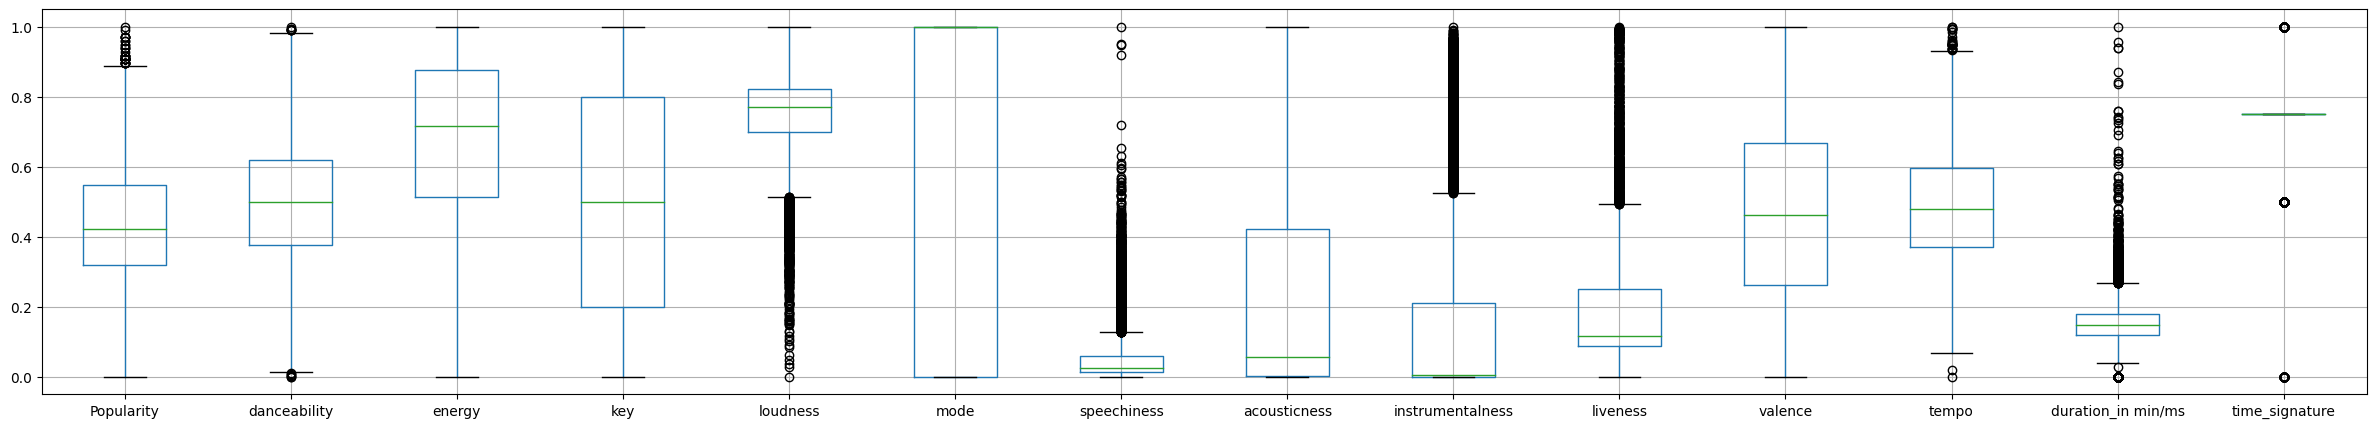

In [442]:
plt.figure(figsize=(30,5))
df1.drop(['Artist Name', 'Track Name', 'Class'], axis=1).boxplot()
print()

In [443]:
def outliers(df, column):
    temp = df[column]
    q1 = temp.quantile(0.25)
    q3 = temp.quantile(0.75)
    irq = q3 - q1
    outliers_min = q1 - (1.5 * irq)
    outliers_max = q3 + (1.5 * irq)
    
    df = df[df[column] >= outliers_min]
    df = df[df[column] <= outliers_max]
    return df

In [444]:
for col in df1.drop(['Artist Name', 'Track Name', 'Class'], axis=1):
    df1 = outliers(df1, col)

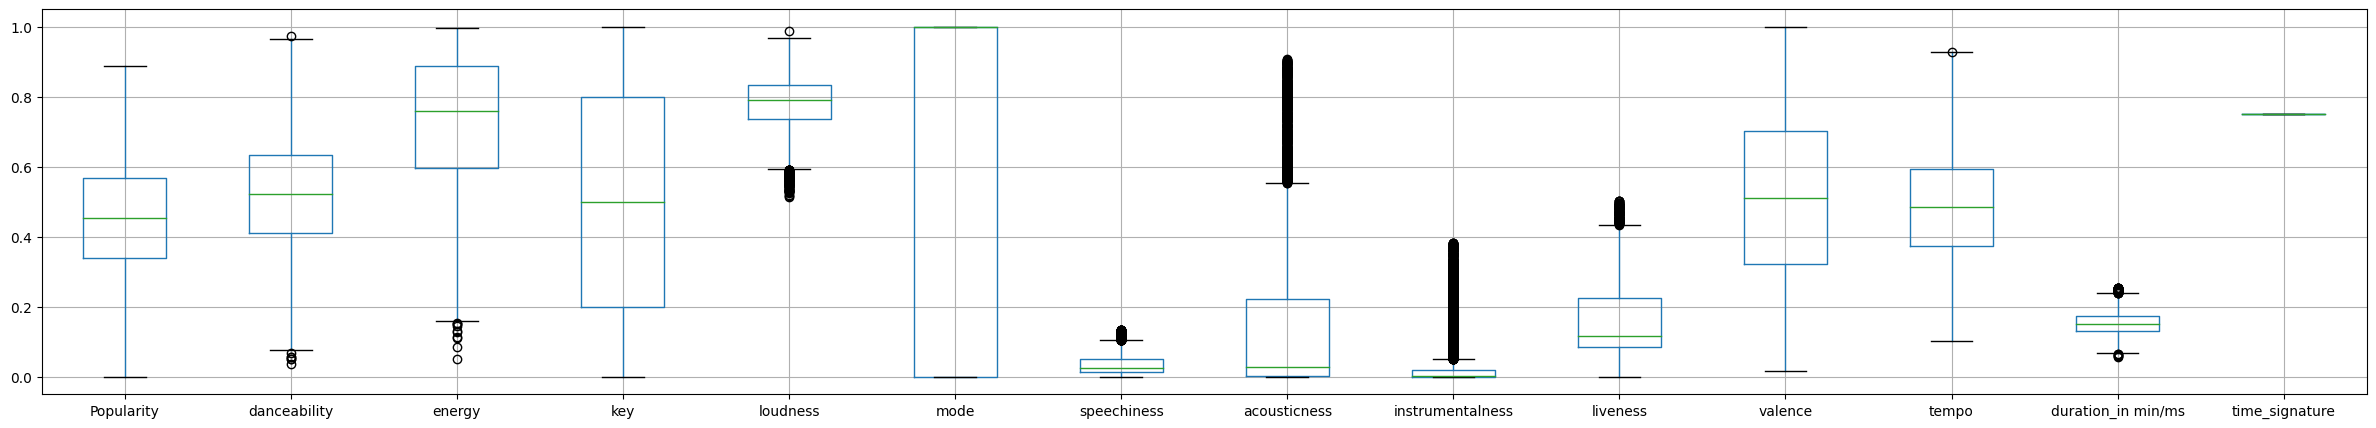

In [445]:
plt.figure(figsize=(30,5))
df1.drop(['Class'], axis=1).boxplot()
print()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16188\227490853.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<AxesSubplot:>

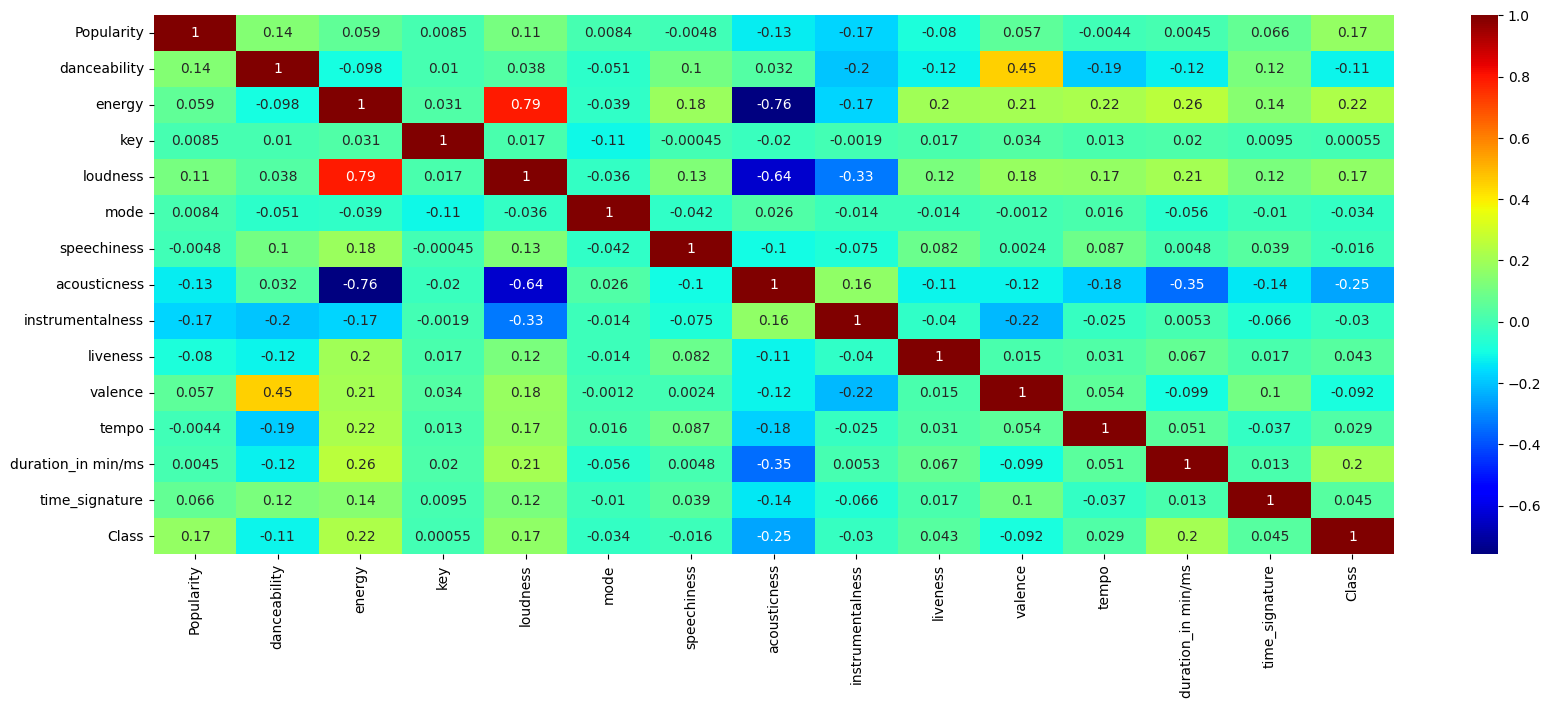

In [552]:
plt.figure(figsize=(20,7))
cor = df.corr()
sns.heatmap(cor, annot = True, cmap='jet')

In [553]:
df1 = df1.reset_index(drop=True)

In [554]:
X = df1[['Popularity', 'danceability', 'energy', 'loudness', 'acousticness', 'duration_in min/ms', 'liveness']]
X_train, X_test = train_test_split(X, test_size=0.2)

In [555]:
X_train.shape

(4879, 7)

In [556]:
X_test.shape

(1220, 7)

In [557]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [558]:
predicted = kmeans.predict(X_test)

In [559]:
predicted

array([1, 0, 2, ..., 4, 1, 0])

In [560]:
kmeans.labels_

array([4, 2, 1, ..., 0, 3, 0])

In [561]:
pca = PCA(n_components=2)

In [562]:
#Y = kmeans.cluster_centers_

In [563]:
X_new = pca.fit_transform(X)
#pca.fit_transform(kmeans.cluster_centers_)

In [564]:
pca_data_train = pd.DataFrame(pca.transform(X_train),columns=['PC1','PC2'])
pca_data_test = pd.DataFrame(pca.transform(X_test),columns=['PC1','PC2'])

In [565]:
centers = pd.DataFrame(pca.transform(kmeans.cluster_centers_),columns=['PC1','PC2'])

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

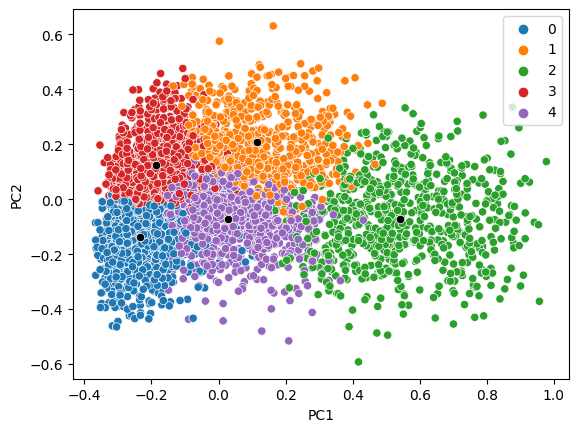

In [566]:
pca_data_train['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data_train)
sns.scatterplot(x="PC1",y="PC2",color='black' ,data=centers)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

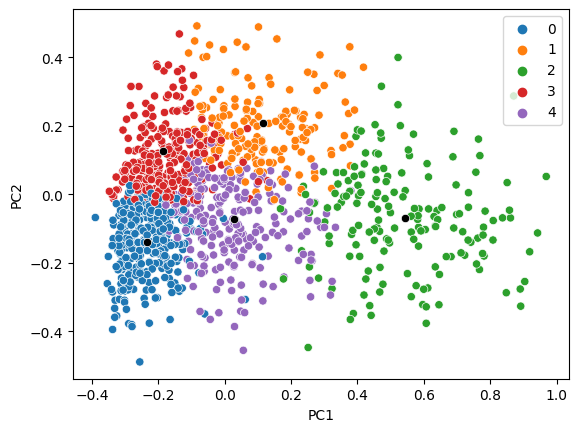

In [567]:
pca_data_test['cluster'] = pd.Categorical(predicted)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data_test)
sns.scatterplot(x="PC1",y="PC2",color='black' ,data=centers)